## 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import stats
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
delv=pd.read_csv('delivery_time.csv')
delv

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
# to change the columns name
delv.columns=['delivery_time','sorting_time']
delv

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA

In [5]:
delv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### No Missing Value

In [6]:
# checking duplicated value
delv[delv.duplicated()]

,delivery_time,sorting_time


#### There are no duplicated values

<AxesSubplot:>

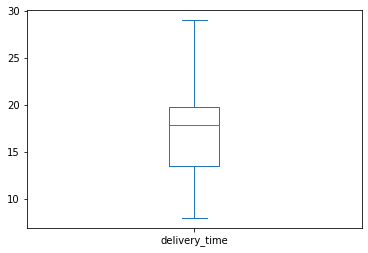

In [7]:
# Checking outlier
delv['delivery_time'].plot(kind='box')

<AxesSubplot:>

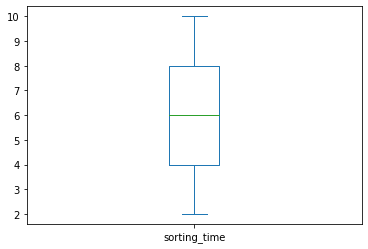

In [8]:
delv['sorting_time'].plot(kind='box')

#### There are no outliers

## Transformation

In [9]:
delv['st_sq']=delv['sorting_time']**0.2
delv['st_sqrt1']=delv['sorting_time']**0.5
delv['st_log']=np.log(delv['sorting_time'])
delv['st_sqrt2']=delv['sorting_time']**0.4

In [10]:
delv

,delivery_time,sorting_time,st_sq,st_sqrt1,st_log,st_sqrt2
0,21.00,10,1.584893,3.162278,2.302585,2.511886
1,13.50,4,1.319508,2.000000,1.386294,1.741101
2,19.75,6,1.430969,2.449490,1.791759,2.047673
3,24.00,9,1.551846,3.000000,2.197225,2.408225
4,29.00,10,1.584893,3.162278,2.302585,2.511886
5,15.35,6,1.430969,2.449490,1.791759,2.047673
6,19.00,7,1.475773,2.645751,1.945910,2.177906
7,9.50,3,1.245731,1.732051,1.098612,1.551846
8,17.90,10,1.584893,3.162278,2.302585,2.511886
9,18.75,9,1.551846,3.000000,2.197225,2.408225


## Correlation Analysis

In [11]:
delv.corr()

,delivery_time,sorting_time,st_sq,st_sqrt1,st_log,st_sqrt2
delivery_time,1.000000,0.825997,0.835162,0.834150,0.833933,0.834847
sorting_time,0.825997,1.000000,0.985891,0.994704,0.977447,0.992266
st_sq,0.835162,0.985891,1.000000,0.997854,0.998986,0.999033
st_sqrt1,0.834150,0.994704,0.997854,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.998986,0.993904,1.000000,0.996045
st_sqrt2,0.834847,0.992266,0.999033,0.999768,0.996045,1.000000


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

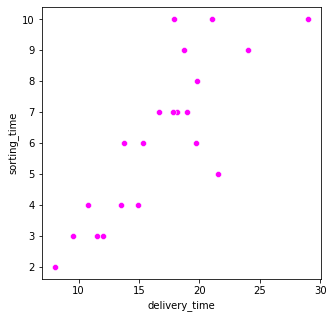

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(delv['delivery_time'],delv['sorting_time'],color='MAGENTA')

#### Correlation between delivery time and sorting time seems low

## Model Building

In [13]:
model1=smf.ols("delivery_time~sorting_time",data=delv).fit()
model2=smf.ols("delivery_time~st_sq",data=delv).fit()
model3=smf.ols("delivery_time~st_sqrt1",data=delv).fit()
model4=smf.ols("delivery_time~st_log",data=delv).fit()
model5=smf.ols("delivery_time~st_sqrt2",data=delv).fit()

## Model Testing

In [14]:
print(model1.params)
print(model2.params)
print(model3.params)
print(model4.params)
print(model5.params)

Intercept       6.582734
sorting_time    1.649020
dtype: float64
Intercept   -29.678540
st_sq        32.753297
dtype: float64
Intercept   -2.518837
st_sqrt1     7.936591
dtype: float64
Intercept    1.159684
st_log       9.043413
dtype: float64
Intercept    -7.050883
st_sqrt2     11.751321
dtype: float64


In [15]:
print(model1.tvalues)
print(model2.tvalues)
print(model3.tvalues)
print(model4.tvalues)
print(model5.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept   -4.210581
st_sq        6.618827
dtype: float64
Intercept   -0.840911
st_sqrt1     6.592434
dtype: float64
Intercept    0.472460
st_log       6.586789
dtype: float64
Intercept   -1.926237
st_sqrt2     6.610589
dtype: float64


In [16]:
print(model1.pvalues)
print(model2.pvalues)
print(model3.pvalues)
print(model4.pvalues)
print(model5.pvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64
Intercept    0.000474
st_sq        0.000002
dtype: float64
Intercept    0.410857
st_sqrt1     0.000003
dtype: float64
Intercept    0.641980
st_log       0.000003
dtype: float64
Intercept    0.069169
st_sqrt2     0.000003
dtype: float64


In [17]:
print(model1.rsquared)
print(model2.rsquared)
print(model3.rsquared)
print(model4.rsquared)
print(model5.rsquared)

0.6822714748417231
0.6974949655971345
0.6958062276308671
0.6954434611324223
0.6969691412160729


In [18]:
print(model1.rsquared_adj)
print(model2.rsquared_adj)
print(model3.rsquared_adj)
print(model4.rsquared_adj)
print(model5.rsquared_adj)

0.6655489208860244
0.6815736479969837
0.6797960290851233
0.6794141696130761
0.6810201486484978


## Model Prediction

In [19]:
delv['prediction']=model5.fittedvalues

In [20]:
delv

,delivery_time,sorting_time,st_sq,st_sqrt1,st_log,st_sqrt2,prediction
0,21.00,10,1.584893,3.162278,2.302585,2.511886,22.467100
1,13.50,4,1.319508,2.000000,1.386294,1.741101,13.409355
2,19.75,6,1.430969,2.449490,1.791759,2.047673,17.011974
3,24.00,9,1.551846,3.000000,2.197225,2.408225,21.248938
4,29.00,10,1.584893,3.162278,2.302585,2.511886,22.467100
5,15.35,6,1.430969,2.449490,1.791759,2.047673,17.011974
6,19.00,7,1.475773,2.645751,1.945910,2.177906,18.542394
7,9.50,3,1.245731,1.732051,1.098612,1.551846,11.185352
8,17.90,10,1.584893,3.162278,2.302585,2.511886,22.467100
9,18.75,9,1.551846,3.000000,2.197225,2.408225,21.248938


## Predict a new data frame using model5

In [21]:
newdata=pd.DataFrame({'sorting_time':[13,16,19]})
newdata['st_sqrt2']=newdata['sorting_time']**0.4
newdata

,sorting_time,st_sqrt2
0,13,2.789827
1,16,3.031433
2,19,3.247143


In [22]:
newdata['Predicted']=model5.predict(newdata)

In [23]:
newdata

,sorting_time,st_sqrt2,Predicted
0,13,2.789827,25.733274
1,16,3.031433,28.572460
2,19,3.247143,31.107338


##### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Q2


In [24]:
import pandas as pd
import numpy as np 
from scipy.stats import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
hike=pd.read_csv('Salary_Data.csv')
hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA

In [26]:
hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
hike[hike.duplicated()]# checking dupicate value

,YearsExperience,Salary


#### There is no duplicate value

#### Checking outliers

<AxesSubplot:>

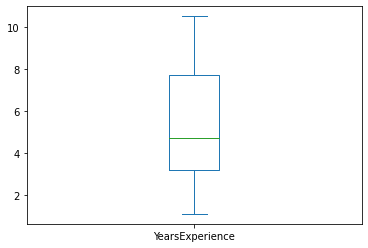

In [28]:
hike['YearsExperience'].plot(kind='box')

<AxesSubplot:>

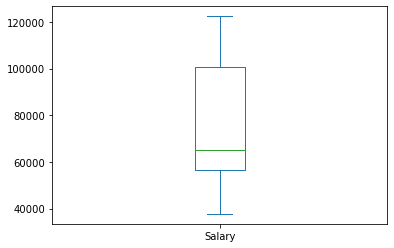

In [29]:
hike['Salary'].plot(kind='box')

#### There are no outliers

### Transformation

In [30]:
hike['y_sq']=hike['YearsExperience']**0.2
hike['y_sqrta']=hike['YearsExperience']**0.5
hike['y_log']=np.log(hike['YearsExperience'])
hike['y_sqrtb']=hike['YearsExperience']**0.4

In [31]:
hike

,YearsExperience,Salary,y_sq,y_sqrta,y_log,y_sqrtb
0,1.1,39343.0,1.019245,1.048809,0.095310,1.038860
1,1.3,46205.0,1.053874,1.140175,0.262364,1.110650
2,1.5,37731.0,1.084472,1.224745,0.405465,1.176079
3,2.0,43525.0,1.148698,1.414214,0.693147,1.319508
4,2.2,39891.0,1.170805,1.483240,0.788457,1.370784
5,2.9,56642.0,1.237313,1.702939,1.064711,1.530944
6,3.0,60150.0,1.245731,1.732051,1.098612,1.551846
7,3.2,54445.0,1.261915,1.788854,1.163151,1.592429
8,3.2,64445.0,1.261915,1.788854,1.163151,1.592429
9,3.7,57189.0,1.299093,1.923538,1.308333,1.687643


## Correlation

In [32]:
hike.corr()

,YearsExperience,Salary,y_sq,y_sqrta,y_log,y_sqrtb
YearsExperience,1.000000,0.978242,0.971714,0.989850,0.953797,0.984932
Salary,0.978242,1.000000,0.944032,0.964884,0.924061,0.959118
y_sq,0.971714,0.944032,1.000000,0.995358,0.997721,0.997884
y_sqrta,0.989850,0.964884,0.995358,1.000000,0.986620,0.999508
y_log,0.953797,0.924061,0.997721,0.986620,1.000000,0.991233
y_sqrtb,0.984932,0.959118,0.997884,0.999508,0.991233,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

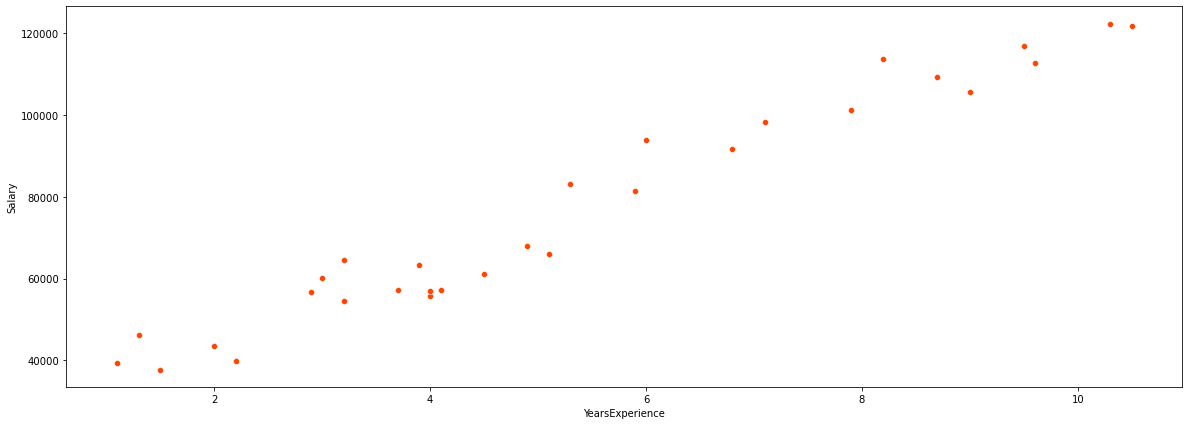

In [33]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=hike,x=hike['YearsExperience'],y=hike['Salary'],color='ORANGERED')

#### Year and Salary seems to be highly correlation

## Model Building

In [34]:
modely=smf.ols("Salary~YearsExperience",data=hike).fit()
modely_sq=smf.ols("Salary~y_sq",data=hike).fit()
modely_sqrta=smf.ols("Salary~y_sqrta",data=hike).fit()
modely_log=smf.ols("Salary~y_log",data=hike).fit()
modely_sqrtb=smf.ols("Salary~y_sqrtb",data=hike).fit()

## Model Testing

In [35]:
print(modely.params)
print(modely_sq.params)
print(modely_sqrta.params)
print(modely_log.params)
print(modely_sqrtb.params)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
Intercept   -138521.365038
y_sq         157602.070301
dtype: float64
Intercept   -16055.769117
y_sqrta      41500.680583
dtype: float64
Intercept    14927.97177
y_log        40581.98796
dtype: float64
Intercept   -36596.558035
y_sqrtb      59929.392484
dtype: float64


In [36]:
print(modely.tvalues)
print(modely_sq.tvalues)
print(modely_sqrta.tvalues)
print(modely_log.tvalues)
print(modely_sqrtb.tvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept    -9.710696
y_sq         15.144115
dtype: float64
Intercept    -3.262308
y_sqrta      19.437148
dtype: float64
Intercept     2.895135
y_log        12.791989
dtype: float64
Intercept    -5.680754
y_sqrtb      17.933172
dtype: float64


In [37]:
print(modely.pvalues)
print(modely_sq.pvalues)
print(modely_sqrta.pvalues)
print(modely_log.pvalues)
print(modely_sqrtb.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
Intercept    1.832735e-10
y_sq         5.137562e-15
dtype: float64
Intercept    2.906965e-03
y_sqrta      8.565358e-18
dtype: float64
Intercept    7.268813e-03
y_log        3.250155e-13
dtype: float64
Intercept    4.335319e-06
y_sqrtb      6.943783e-17
dtype: float64


In [38]:
print(modely.rsquared)
print(modely_sq.rsquared)
print(modely_sqrta.rsquared)
print(modely_log.rsquared)
print(modely_sqrtb.rsquared)

0.9569566641435086
0.8911963132726747
0.9310009544993526
0.853888882875697
0.9199081554025474


In [39]:
print(modely.rsquared_adj)
print(modely_sq.rsquared_adj)
print(modely_sqrta.rsquared_adj)
print(modely_log.rsquared_adj)
print(modely_sqrtb.rsquared_adj)

0.9554194021486339
0.8873104673181273
0.9285367028743294
0.8486706286926862
0.9170477323812098


## Model prediction

In [40]:
hike['Predicted']=modely.fittedvalues

In [41]:
hike

,YearsExperience,Salary,y_sq,y_sqrta,y_log,y_sqrtb,Predicted
0,1.1,39343.0,1.019245,1.048809,0.095310,1.038860,36187.158752
1,1.3,46205.0,1.053874,1.140175,0.262364,1.110650,38077.151217
2,1.5,37731.0,1.084472,1.224745,0.405465,1.176079,39967.143681
3,2.0,43525.0,1.148698,1.414214,0.693147,1.319508,44692.124842
4,2.2,39891.0,1.170805,1.483240,0.788457,1.370784,46582.117306
5,2.9,56642.0,1.237313,1.702939,1.064711,1.530944,53197.090931
6,3.0,60150.0,1.245731,1.732051,1.098612,1.551846,54142.087163
7,3.2,54445.0,1.261915,1.788854,1.163151,1.592429,56032.079627
8,3.2,64445.0,1.261915,1.788854,1.163151,1.592429,56032.079627
9,3.7,57189.0,1.299093,1.923538,1.308333,1.687643,60757.060788


In [42]:
new_data=pd.DataFrame({'YearsExperience':[3,6,9]})

In [43]:
new_data

,YearsExperience
0,3
1,6
2,9


In [44]:
modely.predict(new_data)

0     54142.087163
1     82491.974127
2    110841.861092
dtype: float64

In [45]:
new_data['Predicted']=modely.predict(new_data)
new_data

,YearsExperience,Predicted
0,3,54142.087163
1,6,82491.974127
2,9,110841.861092
